In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
import logging

In [ ]:
try:
    df=pd.read_csv('UCI_Credit_Card.csvabc')
    df.head()
except:
    logging.error('File import Error/Path Error')

ERROR:root:File import Error/Path Error


Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df=df.drop('ID',axis=1)

OUTLIER REMOVAL

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LIMIT_BAL'>

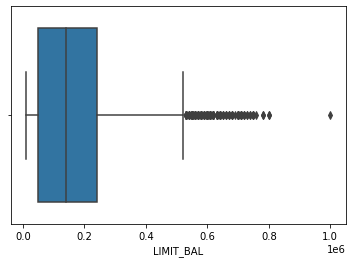

In [ ]:
sns.boxplot('LIMIT_BAL',data=df)

In [ ]:
df['LIMIT_BAL']=np.log(df['LIMIT_BAL'])

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LIMIT_BAL'>

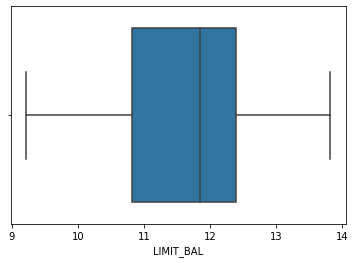

In [ ]:
sns.boxplot('LIMIT_BAL',data=df)

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EDUCATION'>

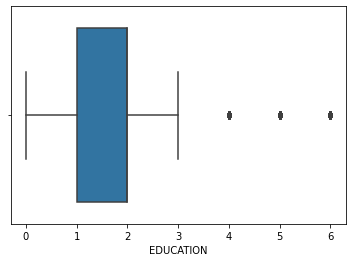

In [ ]:
sns.boxplot(df['EDUCATION'])

In [ ]:
df['EDUCATION']=df['EDUCATION'].replace({4:0,5:0,6:0})

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EDUCATION'>

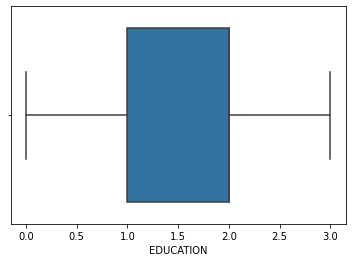

In [ ]:
sns.boxplot(df['EDUCATION'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EDUCATION'>

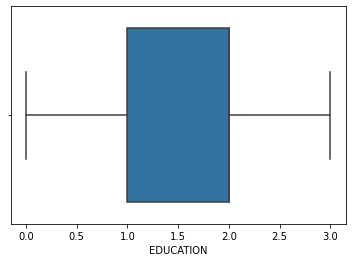

In [ ]:
sns.boxplot('EDUCATION',data=df)

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df['MARRIAGE']=df['MARRIAGE'].replace({0:3})

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MARRIAGE'>

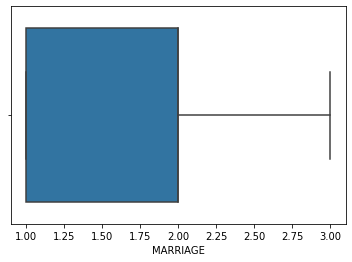

In [ ]:
sns.boxplot('MARRIAGE',data=df)

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

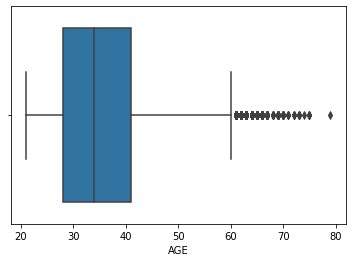

In [ ]:
sns.boxplot('AGE',data=df)

In [ ]:
df=df.drop(df[df['AGE']>=60].index,axis=0)

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

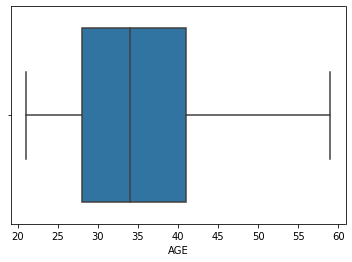

In [ ]:
sns.boxplot('AGE',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29661 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29661 non-null  float64
 1   SEX                         29661 non-null  int64  
 2   EDUCATION                   29661 non-null  int64  
 3   MARRIAGE                    29661 non-null  int64  
 4   AGE                         29661 non-null  int64  
 5   PAY_0                       29661 non-null  int64  
 6   PAY_2                       29661 non-null  int64  
 7   PAY_3                       29661 non-null  int64  
 8   PAY_4                       29661 non-null  int64  
 9   PAY_5                       29661 non-null  int64  
 10  PAY_6                       29661 non-null  int64  
 11  BILL_AMT1                   29661 non-null  float64
 12  BILL_AMT2                   29661 non-null  float64
 13  BILL_AMT3                   296

In [ ]:
df['PAY_0'].value_counts()

 0    14583
-1     5629
 1     3641
-2     2728
 2     2625
 3      316
 4       76
 5       26
 8       18
 6       10
 7        9
Name: PAY_0, dtype: int64

In [ ]:
df['PAY_0'].value_counts()

 0    14583
-1     5629
 1     3641
-2     2728
 2     2625
 3      316
 4       76
 5       26
 8       18
 6       10
 7        9
Name: PAY_0, dtype: int64

In [ ]:
df['PAY_0']=df['PAY_0'].replace([-2,-1],0)

In [ ]:
df['PAY_0'].value_counts()

0    22940
1     3641
2     2625
3      316
4       76
5       26
8       18
6       10
7        9
Name: PAY_0, dtype: int64

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df['PAY_2']=df['PAY_2'].replace([-2,-1],0)
df['PAY_3']=df['PAY_3'].replace([-2,-1],0)
df['PAY_4']=df['PAY_4'].replace([-2,-1],0)
df['PAY_5']=df['PAY_5'].replace([-2,-1],0)
df['PAY_6']=df['PAY_6'].replace([-2,-1],0)


/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BILL_AMT1'>

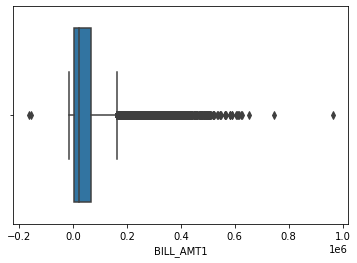

In [ ]:
sns.boxplot('BILL_AMT1',data=df)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df['default.payment.next.month']
X=df.drop(['default.payment.next.month'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr.score(X_test,y_test)

0.8160467468254861

In [ ]:
lr.score(X_train,y_train)

0.8205856853867642

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29661 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29661 non-null  float64
 1   SEX                         29661 non-null  int64  
 2   EDUCATION                   29661 non-null  int64  
 3   MARRIAGE                    29661 non-null  int64  
 4   AGE                         29661 non-null  int64  
 5   PAY_0                       29661 non-null  int64  
 6   PAY_2                       29661 non-null  int64  
 7   PAY_3                       29661 non-null  int64  
 8   PAY_4                       29661 non-null  int64  
 9   PAY_5                       29661 non-null  int64  
 10  PAY_6                       29661 non-null  int64  
 11  BILL_AMT1                   29661 non-null  float64
 12  BILL_AMT2                   29661 non-null  float64
 13  BILL_AMT3                   296

/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/AhsenAliAsif/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PAY_AMT1'>

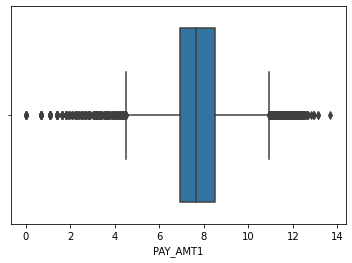

In [ ]:
sns.boxplot(np.log(df['PAY_AMT1']),data=df)

In [ ]:
df[(df['SEX']==1) & (df['default.payment.next.month']==1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
13,11.156251,1,2,2,30,1,2,2,0,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,9.903488,1,1,2,24,0,0,2,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
26,11.002100,1,1,2,27,1,0,0,0,0,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
31,10.819778,1,2,2,33,2,0,0,0,0,...,22734.0,23217.0,23680.0,1718.0,1500.0,1000.0,1000.0,1000.0,716.0,1
38,10.819778,1,1,2,25,1,0,0,0,0,...,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,12.254863,1,2,1,34,3,2,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,11.289782,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,10.308953,1,2,2,37,4,3,2,0,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,11.289782,1,3,1,41,1,0,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
df.iloc[38]

LIMIT_BAL                      10.819778
SEX                             1.000000
EDUCATION                       1.000000
MARRIAGE                        2.000000
AGE                            25.000000
PAY_0                           1.000000
PAY_2                           0.000000
PAY_3                           0.000000
PAY_4                           0.000000
PAY_5                           0.000000
PAY_6                           0.000000
BILL_AMT1                       0.000000
BILL_AMT2                     780.000000
BILL_AMT3                       0.000000
BILL_AMT4                       0.000000
BILL_AMT5                       0.000000
BILL_AMT6                       0.000000
PAY_AMT1                      780.000000
PAY_AMT2                        0.000000
PAY_AMT3                        0.000000
PAY_AMT4                        0.000000
PAY_AMT5                        0.000000
PAY_AMT6                        0.000000
default.payment.next.month      1.000000
Name: 38, dtype:

In [ ]:
df.iloc[38].to_dict()

{'LIMIT_BAL': 10.819778284410283,
 'SEX': 1.0,
 'EDUCATION': 1.0,
 'MARRIAGE': 2.0,
 'AGE': 25.0,
 'PAY_0': 1.0,
 'PAY_2': 0.0,
 'PAY_3': 0.0,
 'PAY_4': 0.0,
 'PAY_5': 0.0,
 'PAY_6': 0.0,
 'BILL_AMT1': 0.0,
 'BILL_AMT2': 780.0,
 'BILL_AMT3': 0.0,
 'BILL_AMT4': 0.0,
 'BILL_AMT5': 0.0,
 'BILL_AMT6': 0.0,
 'PAY_AMT1': 780.0,
 'PAY_AMT2': 0.0,
 'PAY_AMT3': 0.0,
 'PAY_AMT4': 0.0,
 'PAY_AMT5': 0.0,
 'PAY_AMT6': 0.0,
 'default.payment.next.month': 1.0}

In [ ]:
a=df.iloc[38].to_dict()

{'LIMIT_BAL': 10.819778284410283,
 'SEX': 1.0,
 'EDUCATION': 1.0,
 'MARRIAGE': 2.0,
 'AGE': 25.0,
 'PAY_0': 1.0,
 'PAY_2': 0.0,
 'PAY_3': 0.0,
 'PAY_4': 0.0,
 'PAY_5': 0.0,
 'PAY_6': 0.0,
 'BILL_AMT1': 0.0,
 'BILL_AMT2': 780.0,
 'BILL_AMT3': 0.0,
 'BILL_AMT4': 0.0,
 'BILL_AMT5': 0.0,
 'BILL_AMT6': 0.0,
 'PAY_AMT1': 780.0,
 'PAY_AMT2': 0.0,
 'PAY_AMT3': 0.0,
 'PAY_AMT4': 0.0,
 'PAY_AMT5': 0.0,
 'PAY_AMT6': 0.0,
 'default.payment.next.month': 1.0}

In [ ]:
from math import sqrt

In [ ]:
sqrt(29661)

172.22369175000284

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
score=[]
for  x in range(1,172):
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
max(score)

0.8146982807056973

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='rbf')

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
svc.score(X_test,y_test)

0.8204292617147995

In [ ]:
svc.score(X_train,y_train)

0.8292553703882092

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
xgb.score(X_test,y_test)


0.8153725137655916

In [ ]:
xgb.score(X_train,y_train)

0.8887872073981312

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train.shape()

NameError: name 'X_train' is not defined

In [ ]:
rf=RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test,y_test)

0.8162714911787842

In [ ]:
rf.score(X_train,y_train)

0.9997110104999518

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gr=GradientBoostingClassifier(n_estimators=100)

In [ ]:
gr.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gr.score(X_test,y_test)

0.8207663782447466

In [ ]:
gr.score(X_train,y_train)

0.8280030825546671

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc.score(X_test,y_test)

0.7261490055062366

In [ ]:
dtc.score(X_train,y_train)

0.9997110104999518

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv=cross_val_score(DecisionTreeClassifier(),X,y,cv=10)

BOOSTING USING ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=100,base_estimator=XGBClassifier(),learning_rate=0.01)

In [ ]:
ada.fit(X_train,y_train)


AdaBoostClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None, gamma=None,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_bin=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None,
                                                reg_alpha=None, reg_lambda=None, ...),
                   learning_rate=0.01, n_estimators=100)

In [ ]:
ada.score(X_test,y_test)

0.7808742555343297

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29661 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29661 non-null  float64
 1   SEX                         29661 non-null  int64  
 2   EDUCATION                   29661 non-null  int64  
 3   MARRIAGE                    29661 non-null  int64  
 4   AGE                         29661 non-null  int64  
 5   PAY_0                       29661 non-null  int64  
 6   PAY_2                       29661 non-null  int64  
 7   PAY_3                       29661 non-null  int64  
 8   PAY_4                       29661 non-null  int64  
 9   PAY_5                       29661 non-null  int64  
 10  PAY_6                       29661 non-null  int64  
 11  BILL_AMT1                   29661 non-null  float64
 12  BILL_AMT2                   29661 non-null  float64
 13  BILL_AMT3                   296

In [ ]:
pickle.dump(gr,open('credict_defualter_model.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('credict_defualter_model.pkl','rb'))

In [ ]:
pickled_model.predict(X_test)

array([0, 0, 0, ..., 1, 1, 0])